In [44]:
import json
import pandas as pd

with open("../chat_history_cutoff.json") as f:
    data = json.load(f)
    cdf = pd.json_normalize(data)
    cdf["test_name"] = "cutoff"


with open("../chat_history_spacy_cutoff.json") as f:
    data = json.load(f)
    scdf = pd.json_normalize(data)
    scdf["test_name"] = "spacy_cutoff"


df = pd.concat([cdf, scdf], ignore_index=True)


df['gpu_energy.joules'] = df['gpu_energy'] * 3600000
df['gpu_energy.request'] = df['gpu_energy.joules'] / 100
df = df.loc[~df.debug_mode]

/var/folders/21/z6g2wbcn46bc8y3wcpmc3zrr0000gp/T/ipykernel_14451/3931491850.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([cdf, scdf], ignore_index=True)


In [45]:
cutoff_df = df.dropna(subset=['cutoff'])

In [46]:
cutoff_df['gpu_energy.joules.divided'] = cutoff_df['gpu_energy.joules'] / 94

In [47]:
cutoff_df.set_index('cutoff', inplace=True)

test_name
cutoff          Axes(0.125,0.11;0.775x0.77)
spacy_cutoff    Axes(0.125,0.11;0.775x0.77)
Name: gpu_energy.joules.divided, dtype: object

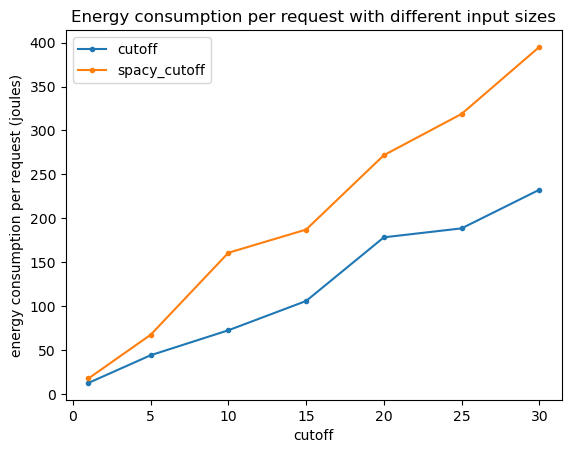

In [48]:
cutoff_df.groupby('test_name')['gpu_energy.joules.divided'].plot(
    legend=True,
    xlabel='cutoff',
    ylabel='energy consumption per request (joules)',
    rot=0,
    title='Energy consumption per request with different input sizes',
    style='.-',
)

test_name
cutoff          Axes(0.125,0.11;0.775x0.77)
spacy_cutoff    Axes(0.125,0.11;0.775x0.77)
Name: score, dtype: object

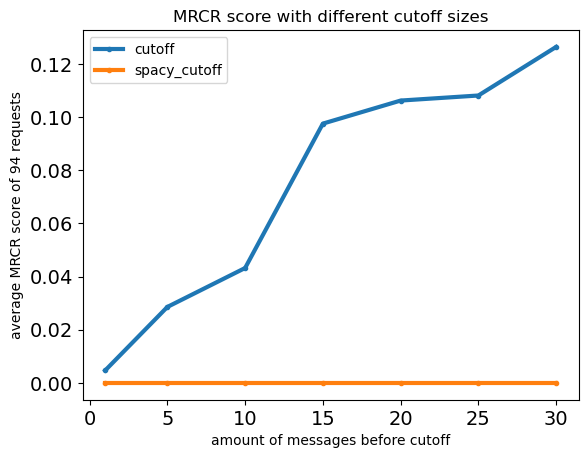

In [49]:
cutoff_df.groupby('test_name')['score'].plot(
    legend=True,
    xlabel='amount of messages before cutoff',
    ylabel='average MRCR score of 94 requests',
    rot=0,
    title='MRCR score with different cutoff sizes',
    style='.-',
    lw=3,
    fontsize=14,
)